# Predict if a the taxi fare in NY City (2017)  using Multiple Regression Modeling
In this notebook, we analyze and predict New York City taxi fares for 2017 using multiple linear regression. The workflow includes data loading, cleaning, exploratory data analysis (EDA), outlier handling, feature engineering (such as creating mean distance and duration features), and building a regression model. We evaluate the model's performance using metrics like R², MAE, and RMSE, and discuss the results and insights gained from the analysis.

In [106]:
#  Imports 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Machine Learning
from sklearn.model_selection import train_test_split    
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score    
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


### EDA and checking assumptions

In [107]:
#Load the dataset
df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv', index_col=0)

In [108]:
df0.shape

(22699, 17)

In [109]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22699 entries, 24870114 to 17208911
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               22699 non-null  int64  
 1   tpep_pickup_datetime   22699 non-null  object 
 2   tpep_dropoff_datetime  22699 non-null  object 
 3   passenger_count        22699 non-null  int64  
 4   trip_distance          22699 non-null  float64
 5   RatecodeID             22699 non-null  int64  
 6   store_and_fwd_flag     22699 non-null  object 
 7   PULocationID           22699 non-null  int64  
 8   DOLocationID           22699 non-null  int64  
 9   payment_type           22699 non-null  int64  
 10  fare_amount            22699 non-null  float64
 11  extra                  22699 non-null  float64
 12  mta_tax                22699 non-null  float64
 13  tip_amount             22699 non-null  float64
 14  tolls_amount           22699 non-null  float64
 1

In [110]:
#check for missing data and duplicates
df0.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [111]:
df = df0.drop_duplicates().reset_index(drop=True)

## Convert columns to datetime

In [112]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [113]:
# Convert datetime columns to datetime
### YOUR CODE HERE ###
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

## Calculate the duration of the trips (minutes)

In [114]:
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60.0   
df['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

In [115]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667


## Imputations ( Outliers Analysis )
### Trip Distance Outliers

Text(0.5, 1.0, 'duration Boxplot')

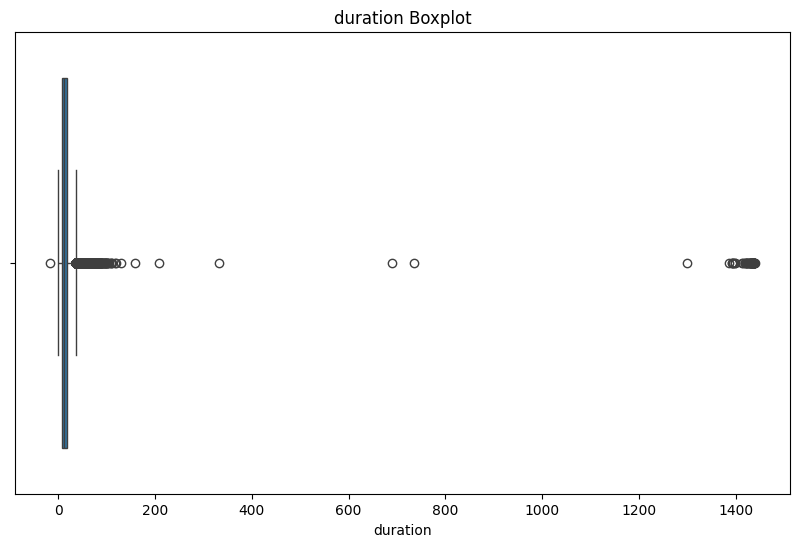

In [116]:
# boxpot of duration, trip distance, and fare amount
plt.figure(figsize=(10, 6)) 
sns.boxplot(x=df['duration'])
plt.title('duration Boxplot')  

Text(0.5, 1.0, 'Boxplot of trip_distance')

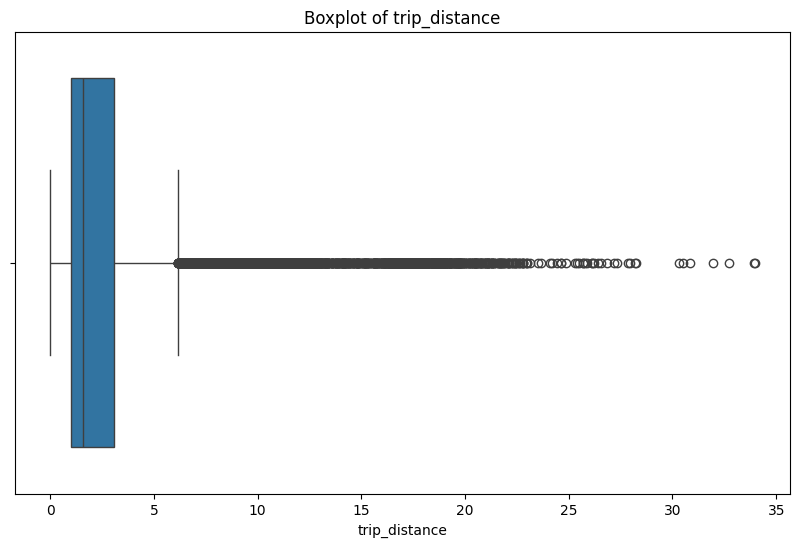

In [117]:
# boxpot of duration, trip distance, and fare amount
plt.figure(figsize=(10, 6)) 
sns.boxplot(x=df['trip_distance'])
plt.title('Boxplot of trip_distance')   

Text(0.5, 1.0, 'Fare Amount Boxplot')

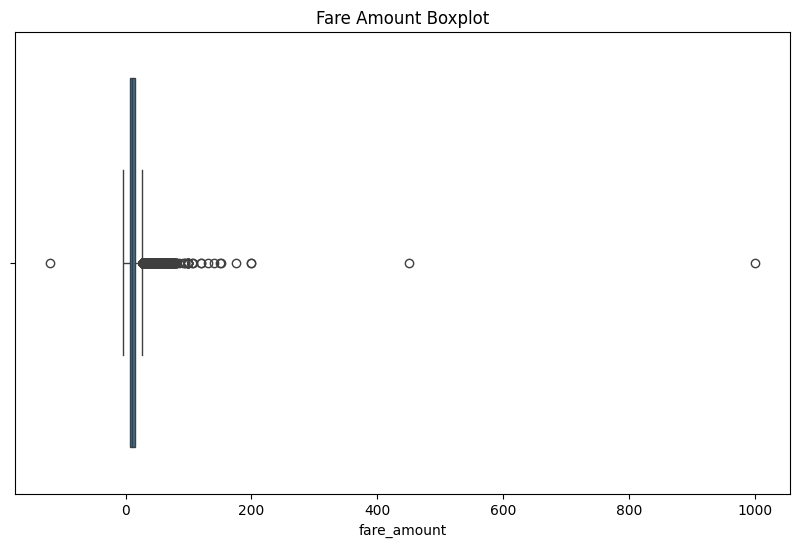

In [118]:
# boxpot of duration, trip distance, and fare amount
plt.figure(figsize=(10, 6)) 
sns.boxplot(x=df['fare_amount'])
plt.title('Fare Amount Boxplot')  

In [119]:
sorted_trip_distance = df['trip_distance'].sort_values()
sorted_trip_distance.head(10)

22026    0.0
795      0.0
6908     0.0
13561    0.0
12238    0.0
6878     0.0
14372    0.0
20638    0.0
920      0.0
16263    0.0
Name: trip_distance, dtype: float64

In [120]:
sorted_unique_distances = sorted_trip_distance.unique()

In [121]:
sorted_unique_distances[0:10]

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])

There are plenty of outliers in duration , trip distance and amount.  The zero value doesn't make sense.  Maybe they are input errors or round down values.  I will investigate how many of this values there are

In [122]:
#type(sorted_trip_distance)
trips_zero_distance = (sorted_trip_distance==0).sum()
print(f"Number of trips with zero distance: {trips_zero_distance}")

Number of trips with zero distance: 148


### Fare Outliers

In [123]:
sorted_fare_amount = df['fare_amount'].sort_values()
sorted_fare_amount.head(10)

12944   -120.0
11204     -4.5
20698     -4.5
14714     -4.0
17602     -4.0
5448      -3.5
20317     -3.5
8204      -3.5
18565     -3.0
4423      -3.0
Name: fare_amount, dtype: float64

In [124]:
sorted_fare_amount.drop_duplicates().sort_values().reset_index(drop=True)[:10]

0   -120.00
1     -4.50
2     -4.00
3     -3.50
4     -3.00
5     -2.50
6      0.00
7      0.01
8      1.00
9      2.50
Name: fare_amount, dtype: float64

In [125]:
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

There are negative values that don't make sense.  Nobody pays less than zero (something unusual happened).  All negative values  will be converted to zero.
The high values (outliers) are also uncommon.  I will use the turkey rule to consider the outliers.  The upper limit of 26.5 is too low for out dataset.  I will use 6 .  The upper limit will be $62.50

In [126]:
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = 0 # Setting lower limit to 0 as fare cannot be negative
upper_limit_iqr = Q3 + 1.5 * IQR # This upper limit is too low for our dataset
upper_limit = Q3 + 6* IQR  # Setting upper limit to Q3 + 6*IQR for outlier removal
print(f"Lower limit: {lower_limit}, Upper limit: {upper_limit} for fare amount")

Lower limit: 0, Upper limit: 62.5 for fare amount


In [127]:
df['fare_amount']= df['fare_amount'].apply(lambda x: max(x,0))
df['fare_amount'] = df['fare_amount'].apply(lambda x: min(x, upper_limit))
df['fare_amount'].describe()


count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64

### Duration Outliers

In [128]:
df['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The duration column also contains values that don’t make sense. Negative numbers are impossible, and extremely high values (like 23 hours) are highly unlikely.
I will impute the negative values in duration with 0 and cap the upper values using the interquartile range (IQR), applying a factor of 6 instead of the standard 1.5. This will help reduce the impact of outliers while preserving most of the realistic trip durations. 

In [129]:
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = 0 # Setting lower limit to 0 as duration cannot be negative
upper_limit_iqr = Q3 + 1.5 * IQR # This upper limit is too low for our dataset
upper_threshold = Q3 + 6* IQR  # Setting upper limit to Q3 + 6*IQR for outlier removal
print(f"Lower limit: {lower_limit}, Upper limit: {upper_threshold} for duration")

Lower limit: 0, Upper limit: 88.78333333333333 for duration


In [130]:
df['duration'] = df['duration'].apply(lambda x: max(x, 0))  # Ensure duration is non-negative
df['duration'] = df['duration'].apply(lambda x: min(x, upper_threshold))  # Cap duration at upper threshold

In [131]:
df['duration'].describe()

count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64

## Feature Engineering

Since the model will be deployed at the beginning of a trip, it won’t know the trip’s actual distance or duration ahead of time. However, we do know the pickup and dropoff locations before the trip begins. So, we can create a new feature — mean_distance — by calculating the average distance for each unique pickup and dropoff pair based on historical data. This gives the model a useful estimate of expected distance at the start of a trip.


In [132]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               22699 non-null  int64         
 1   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 3   passenger_count        22699 non-null  int64         
 4   trip_distance          22699 non-null  float64       
 5   RatecodeID             22699 non-null  int64         
 6   store_and_fwd_flag     22699 non-null  object        
 7   PULocationID           22699 non-null  int64         
 8   DOLocationID           22699 non-null  int64         
 9   payment_type           22699 non-null  int64         
 10  fare_amount            22699 non-null  float64       
 11  extra                  22699 non-null  float64       
 12  mta_tax                22699 non-null  float64       
 13  t

### Mean Distance

In [134]:
unique_pickups = df['PULocationID'].nunique()
unique_dropoffs = df['DOLocationID'].nunique()
print(f"Unique pickup locations: {unique_pickups}, Unique dropoff locations: {unique_dropoffs}")

Unique pickup locations: 152, Unique dropoff locations: 216


In [135]:
#create a new column for the combined pickup and dropoff locations
df['PU_DO'] = df['PULocationID'].astype(str) + '_' + df['DOLocationID'].astype(str)
#print the first 5 rows of the pick up and dropoff locations plus the pu_DO column
df.head(5)[['PULocationID', 'DOLocationID', 'PU_DO']]

,PULocationID,DOLocationID,PU_DO
0,100,231,100_231
1,186,43,186_43
2,262,236,262_236
3,188,97,188_97
4,4,112,4_112


In [136]:
len(df['PU_DO'].value_counts())

4172

In [137]:
#calculate the mean trip distance for each PU_DO combination
mean_distances = df.groupby('PU_DO')['trip_distance'].mean()

In [138]:
# map the mean distances to the PU_DO column
df['mean_distance'] = df['PU_DO'].map(mean_distances)
df.head(5)[['PULocationID', 'DOLocationID', 'PU_DO', 'mean_distance']]

,PULocationID,DOLocationID,PU_DO,mean_distance
0,100,231,100_231,3.521667
1,186,43,186_43,3.108889
2,262,236,262_236,0.881429
3,188,97,188_97,3.700000
4,4,112,4_112,4.435000


In [139]:
df.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,PU_DO,mean_distance
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100_231,3.521667
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186_43,3.108889
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262_236,0.881429


### Mean Duration

In [140]:
mean_durations = df.groupby('PU_DO')['duration'].mean()
df['mean_duration']= df['PU_DO'].map(mean_durations)

In [141]:
df.head(5)[['PULocationID', 'DOLocationID', 'PU_DO', 'mean_distance', 'mean_duration']]

,PULocationID,DOLocationID,PU_DO,mean_distance,mean_duration
0,100,231,100_231,3.521667,22.847222
1,186,43,186_43,3.108889,24.470370
2,262,236,262_236,0.881429,7.250000
3,188,97,188_97,3.700000,30.250000
4,4,112,4_112,4.435000,14.616667


### Create day and month columns

In [142]:
df['day'] = df['tpep_pickup_datetime'].dt.day_name()
#df.head(5)[['day']]

In [143]:
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
#df.head(5)[['month']]

### Rush Hour column
We will define rush_hour as: 
* Weekdays from 6-10 am and 16-20pm

In [144]:
def rush_hour(row):
    if row['day'] in ['Saturday', 'Sunday']:
        return 0  # Not rush hour on weekends
    if (row['tpep_pickup_datetime'].hour >= 6 and row['tpep_pickup_datetime'].hour < 10) or \
       (row['tpep_pickup_datetime'].hour >= 16 and row['tpep_pickup_datetime'].hour < 20):
        return 1  # Rush hour
    return 0  # Not rush hour   

In [145]:
df['rush_hour'] = df.apply(rush_hour, axis=1)

In [146]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,duration,PU_DO,mean_distance,mean_duration,day,month,rush_hour
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,...,0.0,0.3,16.56,14.066667,100_231,3.521667,22.847222,Saturday,March,0
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,...,0.0,0.3,20.80,26.500000,186_43,3.108889,24.470370,Tuesday,April,0
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,...,0.0,0.3,8.75,7.200000,262_236,0.881429,7.250000,Friday,December,1
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,...,0.0,0.3,27.69,30.250000,188_97,3.700000,30.250000,Sunday,May,0
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,...,0.0,0.3,17.80,16.716667,4_112,4.435000,14.616667,Saturday,April,0


## Visualizations

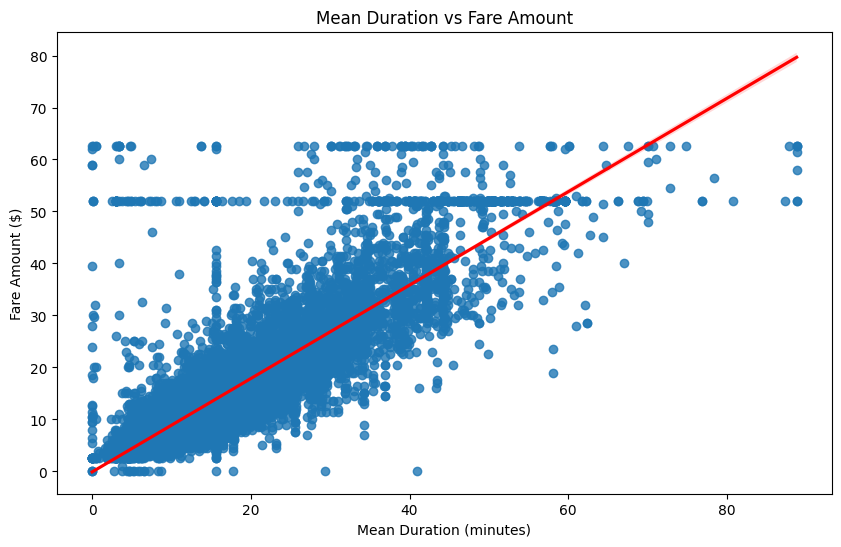

In [147]:
#visualization of relationship between duration and fare amount
plt.figure(figsize=(10, 6))
sns.regplot(x='mean_duration',
                y='fare_amount', 
                data=df, 
                line_kws={"color": "red"}
                )
plt.title('Mean Duration vs Fare Amount')
plt.xlabel('Mean Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.show()

The scatter plot shows a positive correlation between mean trip duration and fare amount, which is expected since longer trips tend to cost more. However, there are noticeable horizontal clusters around $52 and $62.50, suggesting that some trips have a fixed fare regardless of duration.

We set the maximum value for the outliers in 62.50 but we didn't establish any value around $50.  Given the context of NYC taxi data, these flat fare lines likely represent standardized rates to or from high-traffic destinations, such as airports (e.g., JFK to Manhattan has a fixed fare). These trips may vary in duration due to traffic but maintain a consistent fare, which explains the horizontal patterns.

In [148]:
count_fare_52 = df[df['fare_amount'] == 52].shape[0]
print(f"Number of trips with fare amount of 52: {count_fare_52}")

Number of trips with fare amount of 52: 514


## Model Building

## Isolate modeling variables

In [149]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               22699 non-null  int64         
 1   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 3   passenger_count        22699 non-null  int64         
 4   trip_distance          22699 non-null  float64       
 5   RatecodeID             22699 non-null  int64         
 6   store_and_fwd_flag     22699 non-null  object        
 7   PULocationID           22699 non-null  int64         
 8   DOLocationID           22699 non-null  int64         
 9   payment_type           22699 non-null  int64         
 10  fare_amount            22699 non-null  float64       
 11  extra                  22699 non-null  float64       
 12  mta_tax                22699 non-null  float64       
 13  t

In [150]:
df2 = df.copy()

df2 = df2.drop(['tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'PU_DO', 'day', 'month'
               ], axis=1)

In [151]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


In [152]:
selected_columns = ['fare_amount', 'mean_distance', 'mean_duration']
df_selected = df[selected_columns]

In [153]:
df_selected.head()

,fare_amount,mean_distance,mean_duration
0,13.0,3.521667,22.847222
1,16.0,3.108889,24.470370
2,6.5,0.881429,7.250000
3,20.5,3.700000,30.250000
4,16.5,4.435000,14.616667


##  Checking assumptions
### Linearity 
Pairwise relationships between variables

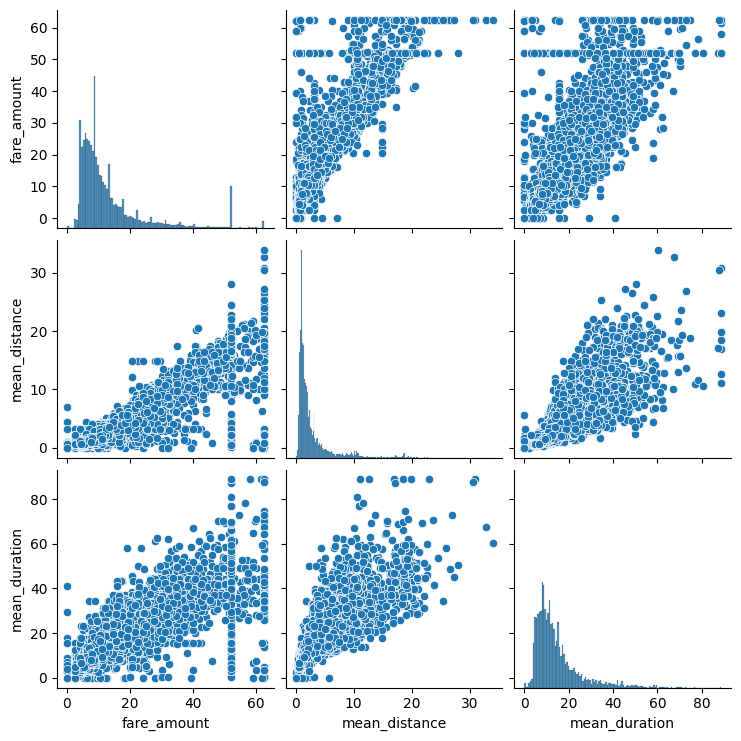

In [154]:
sns.pairplot(df_selected)

All variables show linear correlation with each other

Correlation matrix help determine the most correlated variables adn help prioritize features for the regression model. 

In [155]:
correlation_matrix = df2.corr()
correlation_matrix

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.002874
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.022035
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.020075
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.039725
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.021583
rush_hour,-0.002874,-0.022035,-0.020075,-0.039725,-0.021583,1.000000


In [156]:
correlation_matrix['fare_amount'].sort_values(ascending=False)

fare_amount        1.000000
mean_distance      0.910185
mean_duration      0.859105
passenger_count    0.014942
VendorID           0.001045
rush_hour         -0.020075
Name: fare_amount, dtype: float64

### Correlation heatmap

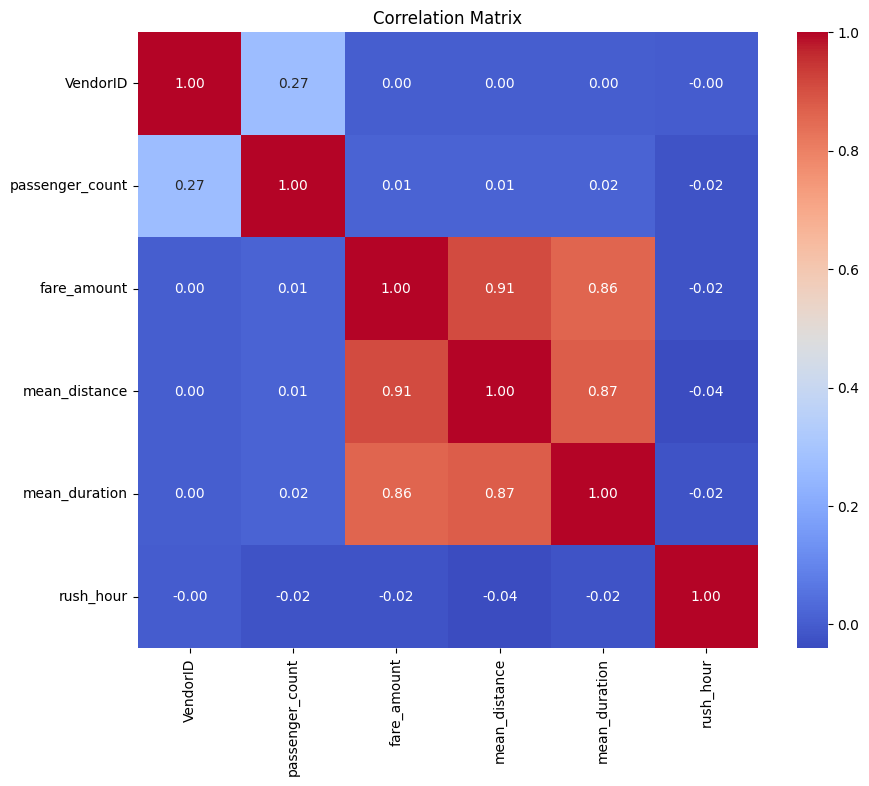

In [157]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


Based on the correlation matrix, both mean_distance and mean_duration have a strong positive correlation with the target variable fare_amount (0.91 and 0.86, respectively), which makes them promising predictors.

However, mean_distance and mean_duration are also highly correlated with each other (r = 0.87), which raises a concern about multicollinearity. Including both variables in the model might cause instability in the coefficient estimates.

Before proceeding with the regression, we will build the model with both variables, and then check for multicollinearity using the Variance Inflation Factor (VIF). Based on the VIF values, we can decide whether to retain both predictors or remove one to reduce redundancy.

## Construct the model
My target variable is the fare amount 

In [158]:
X = df2.drop(columns=['fare_amount'])
y = df2['fare_amount']
X.head()


,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


In [159]:
# vendor is categorical, so we need to convert it to dummy variables
X = pd.get_dummies(X, columns=['VendorID'], drop_first=True)
X.head(5)

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,True
1,1,3.108889,24.470370,0,False
2,1,0.881429,7.250000,1,False
3,1,3.700000,30.250000,0,True
4,1,4.435000,14.616667,0,True


In [160]:
X['VendorID_2'] = X['VendorID_2'].astype(int)
X.head(5)

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,1
1,1,3.108889,24.470370,0,0
2,1,0.881429,7.250000,1,0
3,1,3.700000,30.250000,0,1
4,1,4.435000,14.616667,0,1


### Split the data into training and testing sets

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Standarize the data
We will standarize the data because the variables are on different scales and linear regression model is sensitive to that.  Differences in magnitude can cause numerical stability, or make hard to compare feature importance, etc.

In [162]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("X_train_scaled :", X_train_scaled)

X_train_scaled : [[-0.50301524  0.8694684   0.17616665 -0.64893329  0.89286563]
 [-0.50301524 -0.60011281 -0.69829589  1.54099045  0.89286563]
 [ 0.27331093 -0.47829156 -0.57301906 -0.64893329 -1.11998936]
 ...
 [-0.50301524 -0.45121122 -0.6788917  -0.64893329 -1.11998936]
 [-0.50301524 -0.58944763 -0.85743597  1.54099045 -1.11998936]
 [ 1.82596329  0.83673851  1.13212101 -0.64893329  0.89286563]]


## Fit the model
Instantiate the model and fit it to the training data

In [163]:
#fit the moodel to training data
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Pickle the model

In [164]:
import pickle
# # Save Linear Regression
# with open('Multiple_linear_regression_model.pkl', 'wb') as f:
#     pickle.dump(lr_model, f)

In [165]:
# with open('scaler.pkl', 'wb') as f:
#     pickle.dump(scaler, f)


In [166]:
# Load the model
with open('Multiple_linear_regression_model.pkl', 'rb') as f:
    lr_model = pickle.load(f)

# Load the scaler
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# --- Example: Making predictions with new data ---

# Step 1: Prepare the new data with the same feature order and columns used during training
# new_data = pd.DataFrame({...})  # Ensure columns match the training data exactly

# Step 2: Standardize the new data using the previously fitted scaler
# new_data_scaled = scaler.transform(new_data)

# Step 3: Use the loaded model to make predictions
# predictions = lr_model.predict(new_data_scaled)


### Evaluate the model
We’ll use:
R² (coefficient of determination) – how much variance is explained
MAE (Mean Absolute Error) – average absolute difference
MSE (Mean Squared Error) – penalizes larger errors

### Training Data

In [167]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model performance on the training data
y_pred_train = lr_model.predict(X_train_scaled)

r_sq = lr_model.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)

print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8398434585044773
R^2: 0.8398434585044773
MAE: 2.186666416775414
MSE: 17.88973296349268
RMSE: 4.229625629236313


The linear regression model performs well on the training data, achieving an R² of approximately 0.84. This indicates that the model explains 84% of the variation in taxi fare amounts based on features such as mean distance, duration, passenger count, rush hour, and vendor. The average prediction error is around $2.19 (MAE), and the typical deviation from actual fares (RMSE) is about $4.23. These results suggest the model fits the training data strongly. However, final evaluation on the test set is needed to assess generalization performance.

### Test Data


In [168]:
r_sq_test = lr_model.score(X_test_scaled, y_test)

print('Coefficient of determination:', r_sq_test)
# Evaluate the model performance on the testing data
y_pred_test = lr_model.predict(X_test_scaled)

print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8682583641795454
R^2: 0.8682583641795454
MAE: 2.1336549840593864
MSE: 14.326454156998944
RMSE: 3.785030271609323


## PACE:  Execute
### Results

In [169]:
#createa DataFrame with the predictions
predictions_df = pd.DataFrame({
    'Actual Fare Amount': y_test,
    'Predicted Fare Amount': y_pred_test
})  
predictions_df['residual'] = predictions_df['Actual Fare Amount'] - predictions_df['Predicted Fare Amount']
predictions_df.head(5)

,Actual Fare Amount,Predicted Fare Amount,residual
5818,14.0,12.356503,1.643497
18134,28.0,16.314595,11.685405
4655,5.5,6.726789,-1.226789
7378,15.5,16.227206,-0.727206
13914,9.5,10.536408,-1.036408


### Visualization of model results

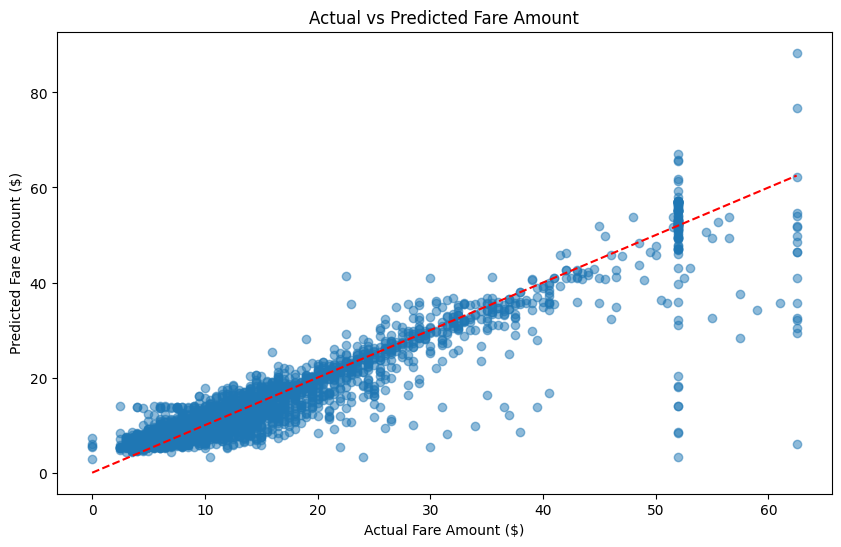

In [170]:
#create a scatter plot of the actual vs predicted fare amount
plt.figure(figsize=(10, 6))
plt.scatter(predictions_df['Actual Fare Amount'], predictions_df['Predicted Fare Amount'], alpha=0.5)
plt.plot([predictions_df['Actual Fare Amount'].min(), predictions_df['Actual Fare Amount'].max()],
         [predictions_df['Actual Fare Amount'].min(), predictions_df['Actual Fare Amount'].max()],
         color='red', linestyle='--')   
plt.title('Actual vs Predicted Fare Amount')
plt.xlabel('Actual Fare Amount ($)')
plt.ylabel('Predicted Fare Amount ($)')
plt.show()


In [171]:
predictions_df['residual'].describe()

count    4540.000000
mean       -0.015443
std         3.785416
min       -25.848142
25%        -1.769731
50%        -0.526766
75%         0.914846
max        56.472310
Name: residual, dtype: float64

Visualization of the residuals using a histogram    

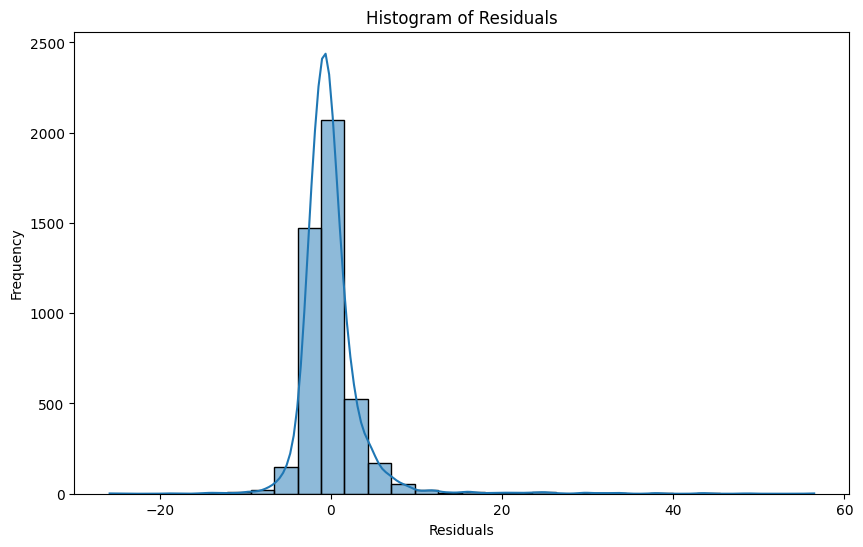

In [172]:
#histogram of the residuals
plt.figure(figsize=(10, 6))
sns.histplot(predictions_df['residual'], bins=30, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

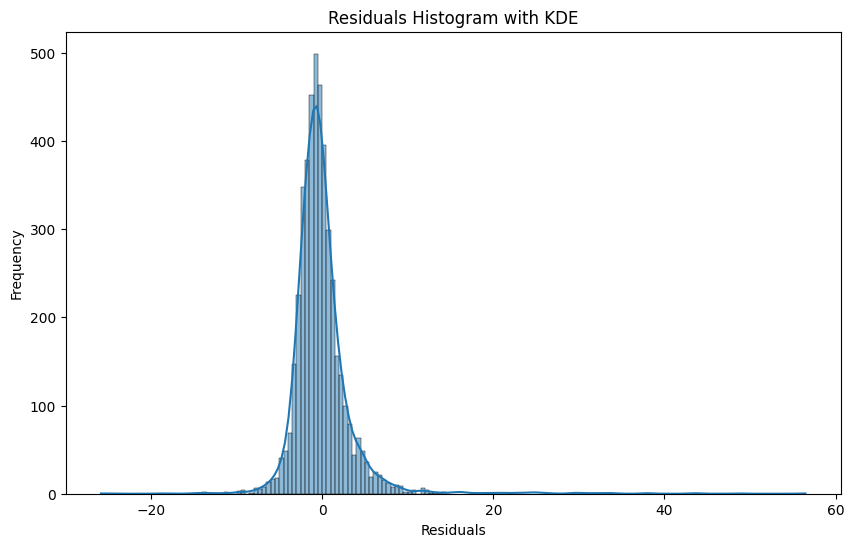

In [173]:
plt.figure(figsize=(10, 6))
sns.histplot(predictions_df['residual'], bins=np.arange(-15, 15.5, 0.5), kde=True)
plt.title('Residuals Histogram with KDE')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [174]:
# residuals mean
predictions_df['residual'].mean()

np.float64(-0.015442621528681056)

Scatterplot of residuals over predictions

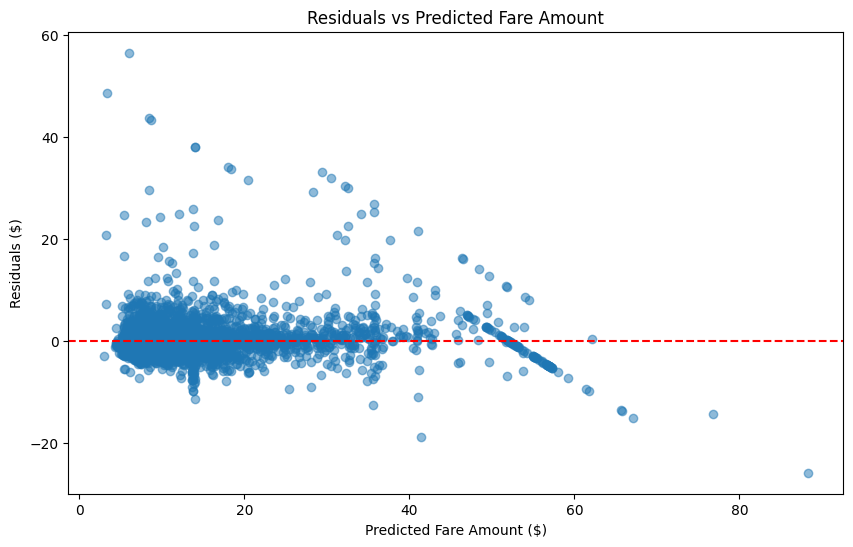

In [175]:
#visualization of residuals over predictions
plt.figure(figsize=(10, 6))
plt.scatter(predictions_df['Predicted Fare Amount'], predictions_df['residual'], alpha=0.5)
plt.axhline(0, color='red', linestyle='--')     
plt.title('Residuals vs Predicted Fare Amount')
plt.xlabel('Predicted Fare Amount ($)')
plt.ylabel('Residuals ($)')
plt.show()

## Coeficients

The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [176]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})  
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
coefficients

,Feature,Coefficient
1,mean_distance,7.133867
2,mean_duration,2.812115
3,rush_hour,0.110233
0,passenger_count,0.030825
4,VendorID_2,-0.054373


In [177]:
# 1. Calculate Standard Deviation of `mean_distance` in X_train data
print(X_train['mean_distance'].std())

# 2. Divide the model coefficient by the standard deviation
print(7.133867 / X_train['mean_distance'].std())

3.5748129752564366
1.9955916713344304


The maximum impact in the trip fare is the distance, which is expected since we are analizing a taxi service.  We can interprete this as for every +1 unit (the data was standarized) in the standard deviation the fare amount increases by a mean of $7.146.  Or for every 3.57 miles the fare increases by aproximately $2

### Predictions in the full dataset

In [178]:
#scaling all the data
X_scaled = scaler.transform(X)
y_preds_full = lr_model.predict(X_scaled)

### Impute ratecodes 2 fare
There are some rate that do not need to be predicted because they have a fixed fare
1 = standard rate  
2 = JFK (airport)  
3 = Newark (airport)  
4 = Nassau or Westchester  
5 = Negotiated fare  
6 = Group ride  

This means that some fares don't need to be predicted. They can simply be imputed based on their rate code. Specifically, all rate codes of `2` can be imputed with \$52, as this is a flat rate for JFK airport.

The other rate codes have some variation but they are not a fixed rate, so these fares will remain untouched.


In [179]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,mean_distance,mean_duration,rush_hour
count,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.556236,2017-06-29 07:32:48.973126656,2017-06-29 07:49:49.799726848,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,12.897913,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,14.460555,2.913313,14.460555,0.296753
min,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2017-03-30 03:09:38.500000,2017-03-30 03:11:20.500000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000,1.010000,8.031481,0.000000
50%,2.000000,2017-06-23 12:35:57,2017-06-23 12:55:11,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.183333,1.620000,11.556667,0.000000
75%,2.000000,2017-10-02 10:34:34,2017-10-02 10:53:47,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.383333,3.115625,17.321667,1.000000
max,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,62.500000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,88.783333,33.920000,88.783333,1.000000
std,0.496838,NaN,NaN,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,10.541137,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,11.947043,3.558993,10.080913,0.456837


In [180]:
df['RatecodeID'].value_counts()

RatecodeID
1     22070
2       513
5        68
3        39
4         8
99        1
Name: count, dtype: int64

We will change all the prediction of fare Amount to $52 when the original RatecodeID is 2

In [181]:
rateCodes = df[['RatecodeID']].copy()


In [182]:
#y_preds_full = lr_model.predict(X_scaled)
# We will change all the prediction of fare Amount to $52 when the original RatecodeID is 2
#create a DataFrame for final predictions that includes RatecodeID and the predictions
df_final_predictions = df[['RatecodeID']].copy() 
df_final_predictions['y_preds_full'] = y_preds_full

# Impute `52` at all predictions where `RatecodeID` is `2`.
df_final_predictions.loc[df_final_predictions['RatecodeID'] == 2, 'y_preds_full'] = 52

# Display the final predictions DataFrame
df_final_predictions[df_final_predictions['RatecodeID'] == 2].head(5)

,RatecodeID,y_preds_full
11,2,52.0
110,2,52.0
161,2,52.0
247,2,52.0
379,2,52.0


### Check performance of the model in the full dataset

In [183]:
# Evaluate the model performance on the full dataset
final_preds = df_final_predictions['y_preds_full']
# GET the performance using the full dataset (y is the original fare amount )

print('R^2:', r2_score(y, final_preds))
print('MAE:', mean_absolute_error(y, final_preds))
print('MSE:', mean_squared_error(y, final_preds))
print('RMSE:',np.sqrt(mean_squared_error(y, final_preds)))

R^2: 0.8910853978683976
MAE: 1.992506252269974
MSE: 12.101575504689935
RMSE: 3.4787318816905013


In [199]:
# Combine means columns with predictions column
nyc_preds_means = df[['mean_duration', 'mean_distance']].copy()
nyc_preds_means['predicted_fare'] = final_preds

nyc_preds_means.head()

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642


In [202]:
#save the final predictions to a CSV file
nyc_preds_means.to_csv('nyc_taxi_fare_predictions_mlr.csv', index=False )

### Filtered out fixed rate rides before training


In [184]:
df_filtered = df[df['RatecodeID'] != 2].copy()
df_filtered.shape

(22186, 24)

In [185]:
# Create a new DataFrame with the 'fare_amount', 'mean_distance', 'mean_duration' columns
df_filtered = df_filtered[['fare_amount', 'mean_distance', 'mean_duration', 'rush_hour','passenger_count' ]].copy()
df_filtered.head()

,fare_amount,mean_distance,mean_duration,rush_hour,passenger_count
0,13.0,3.521667,22.847222,0,6
1,16.0,3.108889,24.470370,0,1
2,6.5,0.881429,7.250000,1,1
3,20.5,3.700000,30.250000,0,1
4,16.5,4.435000,14.616667,0,1


In [186]:
X_filtered = df_filtered.drop(columns=['fare_amount'])
y_filtered= df_filtered['fare_amount']


In [187]:
X_filtered_train,X_filtered_test, y_filtered_train, y_filtered_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=0)

In [188]:
scaler_filtered = StandardScaler().fit(X_filtered_train)
X_filtered_train_scaled = scaler_filtered.transform(X_filtered_train)
X_filtered_test_scaled = scaler_filtered.transform(X_filtered_test)

In [189]:
lr_model_filtered = LinearRegression()
lr_model_filtered.fit(X_filtered_train_scaled, y_filtered_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [190]:
y_preds_filtered_train = lr_model_filtered.predict(X_filtered_train_scaled)
# Evaluate the model performance on the training data
r_sq_filtered_train = lr_model_filtered.score(X_filtered_train_scaled, y_filtered_train)
print('Coefficient of determination in train data:', r_sq_filtered_train)

Coefficient of determination in train data: 0.8430931011019728


In [191]:
r_sq_filtered = lr_model_filtered.score(X_filtered_test_scaled, y_filtered_test)
print('Coefficient of determination in test data:', r_sq_filtered)

Coefficient of determination in test data: 0.8349722615299082


In [192]:
y_preds_filtered_test = lr_model_filtered.predict(X_filtered_test_scaled)

In [193]:
predictions_df_filtered = pd.DataFrame({
    'Actual Fare Amount': y_filtered_test,  
    'Predicted Fare Amount': y_preds_filtered_test
})
predictions_df_filtered['residual'] = predictions_df_filtered['Actual Fare Amount'] - predictions_df_filtered['Predicted Fare Amount']
predictions_df_filtered.head(5)


,Actual Fare Amount,Predicted Fare Amount,residual
18484,10.0,9.915669,0.084331
10872,4.0,5.108068,-1.108068
15776,13.5,7.435805,6.064195
13639,9.5,9.639365,-0.139365
18446,12.5,6.519297,5.980703


In [194]:
#print evaluation metrics
print('R^2:', r2_score(y_filtered_test, y_preds_filtered_test))
print('MAE:', mean_absolute_error(y_filtered_test, y_preds_filtered_test))  
print('MSE:', mean_squared_error(y_filtered_test, y_preds_filtered_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_filtered_test, y_preds_filtered_test)))

R^2: 0.8349722615299082
MAE: 1.9872648423946104
MSE: 12.229967380860783
RMSE:  3.497137026320356


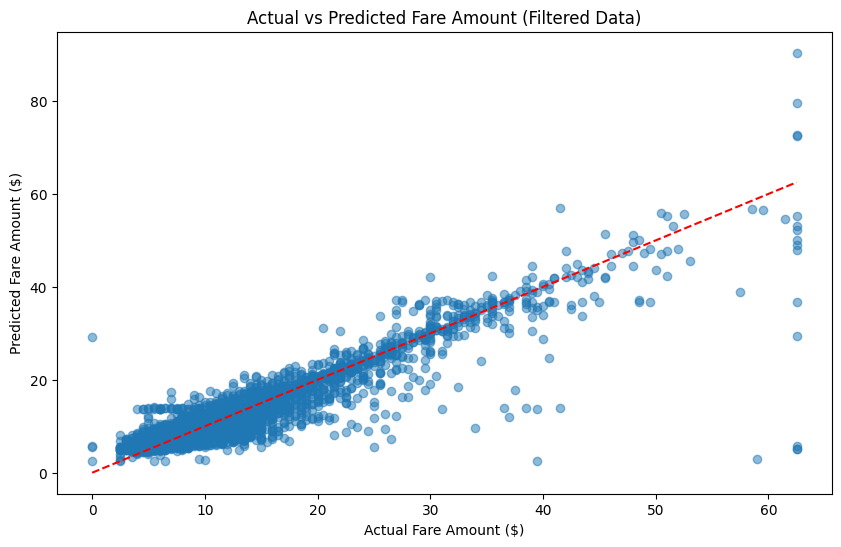

In [195]:
#create a scatter plot of the actual vs predicted fare amount in the filtered dataset
plt.figure(figsize=(10, 6))
plt.scatter(predictions_df_filtered['Actual Fare Amount'], predictions_df_filtered['Predicted Fare Amount'], alpha=0.5)
plt.plot([predictions_df_filtered['Actual Fare Amount'].min(), predictions_df_filtered['Actual Fare Amount'].max()],
         [predictions_df_filtered['Actual Fare Amount'].min(), predictions_df_filtered['Actual Fare Amount'].max()],
         color='red', linestyle='--')   
plt.title('Actual vs Predicted Fare Amount (Filtered Data)')
plt.xlabel('Actual Fare Amount ($)')
plt.ylabel('Predicted Fare Amount ($)')
plt.show()

In [196]:
coefficients_filtered = pd.DataFrame({
    'Feature': X_filtered.columns,
    'Coefficient': lr_model_filtered.coef_
})
coefficients_filtered.sort_values(by='Coefficient', ascending=False, inplace=True)
coefficients_filtered

,Feature,Coefficient
0,mean_distance,5.913288
1,mean_duration,2.491749
2,rush_hour,0.151131
3,passenger_count,0.028061


### Results without filtering the JFK trips

| Feature           | Coefficient |
|-------------------|-------------|
| mean_distance     | 7.133867    |
| mean_duration     | 2.812115    |
| rush_hour         | 0.110233    |
| passenger_count   | 0.030825    |
| VendorID_2        | -0.054373   |

In the model with the filtering data, I didn't consider the vendorID column

### Results  filtering the JFK trips

| Feature           | Coefficient |
|-------------------|-------------|
| mean_distance     | 5.913288    |
| mean_duration     | 2.491749    |
| rush_hour         | 0.151131    |
| passenger_count   | 0.028061    |


In [198]:
# 3. Calculate Standard Deviation of `mean_duration` in X_filtered_train data
print(X_filtered_train['mean_duration'].std())
# 4. Divide the model coefficient by the standard deviation
print(5.913288 / X_filtered_train['mean_duration'].std())

8.790695919881271
0.6726757533071245


The model predicts that mean_distance has the largest effect on fare. However, since the model was trained on standardized data, we cannot interpret the coefficient directly as "$X per mile."

After unscaling, we find that for every 8.79 miles, the fare increases by approximately $5.91, or about $0.67 per mile, controlling for other variables like duration and rush hour.

This aligns with the expectation that fare is influenced by both distance and time, and that fixed-rate trips like those to JFK can skew the results if not filtered or adjusted for.